In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mi_dataframe = pd.read_csv(r"EncuestaPA_JV.csv", index_col='email')
#mi_dataframe.head(len(mi_dataframe))

FileNotFoundError: [Errno 2] No such file or directory: 'EncuestaPA_JV.csv'

In [ ]:
#Guarda la columna de estado en un nuevo DataFrame.
nueva_columna = mi_dataframe['estado']
estados_venezuela = pd.DataFrame(nueva_columna)

print(estados_venezuela)

                                            estado
email                                             
manuelmaldonado408@gmail.com                Mérida
camachofloriana28@gmail.com                 Mérida
luiscogollom.2004@gmail.com                 Mérida
cabrileskevin9@gmail.com                   Miranda
genesisyeimardelgado@gmail.com    Distrito Capital
...                                            ...
marquez.sosa.mariangel@gmail.com            Mérida
katiuskamrc@gmail.com                      Barinas
ironmarquez403@gmail.com                   Barinas
angulodaniel95@gmail.com                    Mérida
luriannysj@gmail.com              Distrito Capital

[240 rows x 1 columns]


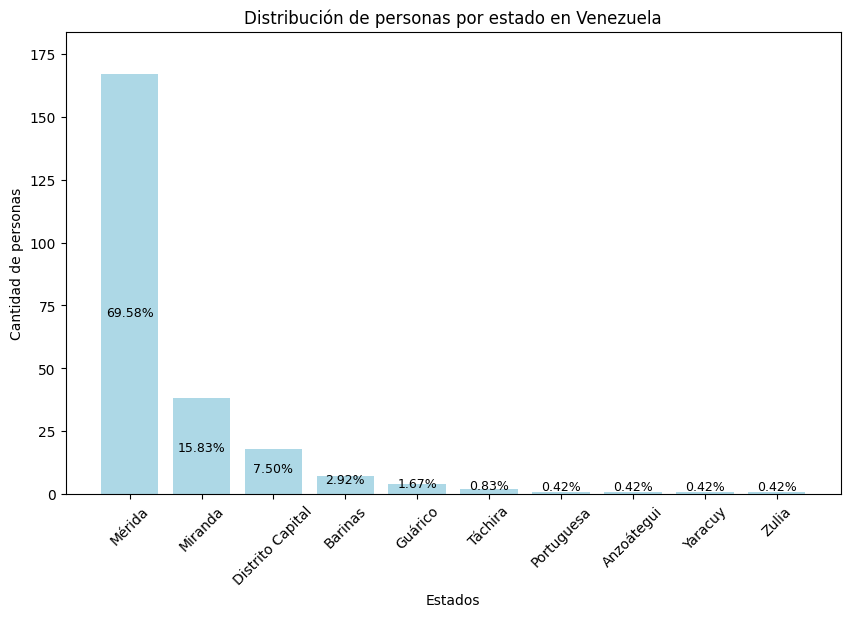

In [ ]:
def comparar_personas_venezuela(df, columna_estado):
    # Filtramos el DataFrame para eliminar filas con valores faltantes 
    df_filtrado = df.dropna(subset=[columna_estado])

    # Obtenemos los estados únicos y contamos cuántas veces aparece cada uno
    estados_unicos = df_filtrado[columna_estado].unique()
    conteo_estados = df_filtrado[columna_estado].value_counts()

    # Creamos un DataFrame para el gráfico
    data = {'Estado': estados_unicos, 'Cantidad': conteo_estados}
    df_grafico = pd.DataFrame(data).reset_index(drop=True)

    # Calculamos el total de personas y el porcentaje para cada estado
    total_personas = conteo_estados.sum()
    df_grafico['Porcentaje'] = (df_grafico['Cantidad'] / total_personas) * 100

    # Creamos la figura y el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(df_grafico['Estado'], df_grafico['Cantidad'], width=0.8, color="lightblue")
    plt.title('Distribución de personas por estado en Venezuela')
    plt.xlabel('Estados')
    plt.ylabel('Cantidad de personas')
    plt.xticks(rotation=45)
    plt.ylim(0, df_grafico['Cantidad'].max() * 1.1)

    # Agregamos etiquetas de datos con los porcentajes
    for i in range(len(df_grafico)):
        plt.text(df_grafico['Estado'].iloc[i], df_grafico['Porcentaje'].iloc[i], f"{df_grafico['Porcentaje'].iloc[i]:.2f}%", ha='center', va='bottom', fontsize=9)

    
    plt.show()

comparar_personas_venezuela(estados_venezuela.copy(), 'estado')

In [ ]:
estados_venezuela.head()

,estado
email,
manuelmaldonado408@gmail.com,Mérida
camachofloriana28@gmail.com,Mérida
luiscogollom.2004@gmail.com,Mérida
cabrileskevin9@gmail.com,Miranda
genesisyeimardelgado@gmail.com,Distrito Capital


In [ ]:
#Código para guardar el dataframe de estados en un csv.
#estados_venezuela.to_csv('Estados_venezuela.csv',
#          index=False,
#          header=True,
#          sep=';',
#          decimal=',',
#          encoding='utf-8',
#          na_rep='N/A')